In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Clic aquí para mostrar/ocultar código">
</form>''')

**Nota:** si usted no alcanzó a hacer la instalación de las librerías requeridas. Puede intentarlo aquí (recuerde que debe estar conectado a internet). Dele un par de minutos a cada celda...

In [ ]:
! conda install -y geopandas

In [ ]:
! conda install -c conda-forge -y contextily

In [77]:
# import geopandas
import pandas as pd
pd.set_option('display.max_columns', 100)
from shapely.geometry import Point
from matplotlib import pyplot as plt
import contextily as ctx  


  * Use la función `pd.read_hdf` para leer la tabla de incidentes de tránsito del archivo `incidentes.h5`
 

In [5]:
icd = pd.read_hdf( 'c:/_DATA/DW3/incidentes.h5')

  * Haga una primera inspeccion de la tabla con el método `.head()`

In [7]:
icd.head(3 )

,CODIGO,TIPO DE INCIDENTE,TIPO FINALIZACION,FECHA ALTA,FECHA DE CREACION,FECHA EN EL LUGAR,FECHA DE FINALIZACION,LATITUD,LONGITUD,COMUNA,TIENE AGENTE,AG1,AG2,AG3,INTERVALO,DIRECCION,TURNO,VEHICULO INVOLUCRADO1,VEHICULO INVOLUCRADO2,VEHICULO INVOLUCRADO3,VEHICULO INVOLUCRADO4,VEHICULO SMM,MOTO SMM,BETA 1,BETA 2,BETA 3,MOTO,NOTAS
0,20180101001435000,002 Lesiones accidente de Tránsito (979),Negativo en sitio,2018-01-01 00:13:51,2018-01-01 00:14:36,2018-01-01 00:56:37,2018-01-01 00:58:29,6.267260,-75.553800,Manrique,Sí,BXiAhn,9b4/Bs,NaN,30 a 60 minutos,0;C72_44;El Pomar;Manrique;Medellín,NaN,NaN,NaN,NaN,NaN,NaN,Moto,NaN,NaN,NaN,TT-212,+ 01/01/2018 00:14:35-mrios: AUTO Y MOTO\nAMBU...
1,20180101001601000,007 Servicio Recoge Motos,Positivo,2018-01-01 00:15:30,2018-01-01 00:16:02,2018-01-01 00:54:11,2018-01-01 00:54:31,6.274677,-75.574154,CASTILLA,Sí,ozqRU5,NaN,NaN,30 a 60 minutos,0;K65_78;CASTILLA;EVERFIT;MEDELLIN,NaN,Moto,NaN,NaN,NaN,Vehículo,NaN,MO-284,NaN,NaN,NaN,\n+ 01/01/2018 00:16:08-spiedrahita: IT-\n\n+ ...
2,20180101002501000,002 Lesiones accidente de Tránsito (979),Positivo,2018-01-01 00:24:05,2018-01-01 00:25:02,2018-01-01 01:09:52,2018-01-01 03:05:59,6.275000,-75.559300,Aranjuez,Sí,BXiAhn,9b4/Bs,NaN,30 a 60 minutos,0;K50A_81A;Brasilia;Aranjuez;Medellín,NaN,Moto,Peatón,NaN,NaN,NaN,Moto,NaN,NaN,NaN,TT-212,+ 01/01/2018 00:25:01-mrios: MOTO Y TRES PEATO...


## Parte 1: Análisis exploratorio inicial y preprocesamiento de datos 

   * Inspeccione los tipos de columnas con el atributo `.dtypes`
¿ Cuáles columnas contienen fechas y horas? 

In [15]:
icd.dtypes

CODIGO                            int64
TIPO DE INCIDENTE                object
TIPO FINALIZACION                object
FECHA ALTA               datetime64[ns]
FECHA DE CREACION        datetime64[ns]
FECHA EN EL LUGAR        datetime64[ns]
FECHA DE FINALIZACION    datetime64[ns]
LATITUD                         float64
LONGITUD                        float64
COMUNA                           object
TIENE AGENTE                     object
AG1                              object
AG2                              object
AG3                              object
INTERVALO                        object
DIRECCION                        object
TURNO                            object
VEHICULO INVOLUCRADO1            object
VEHICULO INVOLUCRADO2            object
VEHICULO INVOLUCRADO3           float64
VEHICULO INVOLUCRADO4           float64
VEHICULO SMM                     object
MOTO SMM                         object
BETA 1                           object
BETA 2                           object


  * Renombre las columnas a minúscula y usando abreviaturas y eliminando espacios. Esto hará el trabajo posterior más ágil, llevadero y sus dedos se lo agradecerán!. Agregue los siguientes pares al diccionario. 

In [21]:
dict( zip( icd.columns, 
          [ col.lower().replace(' ', '_') for col in icd.columns] ) )

{'CODIGO': 'codigo',
 'TIPO DE INCIDENTE': 'tipo_de_incidente',
 'TIPO FINALIZACION': 'tipo_finalizacion',
 'FECHA ALTA': 'fecha_alta',
 'FECHA DE CREACION': 'fecha_de_creacion',
 'FECHA EN EL LUGAR': 'fecha_en_el_lugar',
 'FECHA DE FINALIZACION': 'fecha_de_finalizacion',
 'LATITUD': 'latitud',
 'LONGITUD': 'longitud',
 'COMUNA': 'comuna',
 'TIENE AGENTE': 'tiene_agente',
 'AG1': 'ag1',
 'AG2': 'ag2',
 'AG3': 'ag3',
 'INTERVALO': 'intervalo',
 'DIRECCION': 'direccion',
 'TURNO': 'turno',
 'VEHICULO INVOLUCRADO1': 'vehiculo_involucrado1',
 'VEHICULO INVOLUCRADO2': 'vehiculo_involucrado2',
 'VEHICULO INVOLUCRADO3': 'vehiculo_involucrado3',
 'VEHICULO INVOLUCRADO4': 'vehiculo_involucrado4',
 'VEHICULO SMM': 'vehiculo_smm',
 'MOTO SMM': 'moto_smm',
 'BETA 1': 'beta_1',
 'BETA 2': 'beta_2',
 'BETA 3': 'beta_3',
 'MOTO': 'moto',
 'NOTAS': 'notas'}

In [22]:
icd = icd.rename( columns=
    {'CODIGO': 'cod',
     'TIPO DE INCIDENTE': 'tipo_incidente',
     'TIPO FINALIZACION': 'tipo_fin',
     'FECHA ALTA': 'f_alta',
     'FECHA DE CREACION': 'f_creacion',
     'FECHA EN EL LUGAR': 'f_en_lugar',
     'FECHA DE FINALIZACION': 'f_fin',
     'LATITUD': 'lat',
     'LONGITUD': 'lon',
     'COMUNA': 'comuna',
     'TIENE AGENTE': 'tiene_ag',
     'AG1': 'ag1',
     'AG2': 'ag2',
     'AG3': 'ag3',
     'INTERVALO': 'intervalo',
     'DIRECCION': 'direccion',
     'TURNO': 'turno',
     'VEHICULO INVOLUCRADO1': 'vehi_invol1',
     'VEHICULO INVOLUCRADO2': 'vehi_invol2',
     'VEHICULO INVOLUCRADO3': 'vehi_invol3',
     'VEHICULO INVOLUCRADO4': 'vehi_invol4',
     'VEHICULO SMM': 'vehi_smm',
     'MOTO SMM': 'moto_smm',
     'BETA 1': 'beta_1',
     'BETA 2': 'beta_2',
     'BETA 3': 'beta_3',
     'MOTO': 'moto',
     'PMV': 'pmv',
     'UBICACIÓN PMV1': 'ubic_pmv1',
     'UBICACIÓN PMV2': 'ubic_pmv2',
     'CCTV': 'cctv',
     'UBICACIÓN CCTV1': 'ubic_cctv1',
     'UBICACIÓN CCTV2': 'ubic_cctv2',
     'NOTAS': 'notas',
     'TIPO RECURSO': 'tipo_recurso',
     } )

### Agregando columnas de dia del mes, dia de la semana, etc...

Observe como las siguientes definiciones usan el accessor `.dt` para extraer componentes de la fecha de
creacion y *enriquecer* el dataframe con nuevas columnas.

Agregue dos columnas más `dia_mes` y `hora` con el día del mes (número) y la hora del día.  Trate de adivinar qué miembro de `.dt` usar en cada caso. Si no adivina puede consultar 
`help( icd['f_creacion'].dt )` o preguntarle a un compañero.

In [24]:
icd['f_creacion']

0       2018-01-01 00:14:36
1       2018-01-01 00:16:02
2       2018-01-01 00:25:02
3       2018-01-01 00:44:21
4       2018-01-01 00:56:05
5       2018-01-01 01:11:52
6       2018-01-01 01:26:51
7       2018-01-01 01:33:31
8       2018-01-01 01:37:43
9       2018-01-01 02:01:56
10      2018-01-01 02:09:11
11      2018-01-01 02:18:53
12      2018-01-01 02:24:56
13      2018-01-01 02:30:26
14      2018-01-01 02:33:16
15      2018-01-01 02:36:15
16      2018-01-01 02:57:02
17      2018-01-01 03:02:45
18      2018-01-01 03:07:07
19      2018-01-01 03:16:05
20      2018-01-01 03:38:55
21      2018-01-01 04:42:21
22      2018-01-01 04:50:14
23      2018-01-01 05:08:45
24      2018-01-01 05:14:13
25      2018-01-01 05:18:35
26      2018-01-01 05:53:02
27      2018-01-01 05:55:31
28      2018-01-01 06:02:05
29      2018-01-01 06:05:25
                ...        
23261   2018-03-31 21:19:57
23262   2018-03-31 21:33:22
23263   2018-03-31 21:40:24
23264   2018-03-31 21:42:17
23265   2018-03-31 2

In [28]:
icd['lon'].mean()

-75.57761848270161

In [33]:
type( icd['lon'].mean )

method

In [30]:
import numpy as np

In [32]:
type( np.mean )

function

In [31]:
np.mean( icd['lon']  ) 

-75.57761848270161

In [35]:
icd.shape

(23291, 34)

In [34]:
icd['dia_mes']  = icd['f_creacion'].dt.day
icd['dia_sem']  = icd['f_creacion'].dt.day_name( locale='es')  
icd['mes_nomb'] = icd['f_creacion'].dt.month_name( locale='es')  
icd['mes'] = icd['f_creacion'].dt.month
icd['hora'] = icd['f_creacion'].dt.hour
icd['semana_anho'] = icd['f_creacion'].dt.weekofyear

In [ ]:
#help( icd['f_creacion'].dt ) 

In [36]:
icd[['f_creacion','dia_mes', 'mes', 'dia_sem', 'hora', 
     'mes_nomb', 'semana_anho']]

,f_creacion,dia_mes,mes,dia_sem,hora,mes_nomb,semana_anho
0,2018-01-01 00:14:36,1,1,Lunes,0,Enero,1
1,2018-01-01 00:16:02,1,1,Lunes,0,Enero,1
2,2018-01-01 00:25:02,1,1,Lunes,0,Enero,1
3,2018-01-01 00:44:21,1,1,Lunes,0,Enero,1
4,2018-01-01 00:56:05,1,1,Lunes,0,Enero,1
5,2018-01-01 01:11:52,1,1,Lunes,1,Enero,1
6,2018-01-01 01:26:51,1,1,Lunes,1,Enero,1
7,2018-01-01 01:33:31,1,1,Lunes,1,Enero,1
8,2018-01-01 01:37:43,1,1,Lunes,1,Enero,1
9,2018-01-01 02:01:56,1,1,Lunes,2,Enero,1


### Descomponiendo la columna `direccion`

La columna `direccion` es un concatenación de varios valores. 

Para más facilidad de procesamiento y para seguir los principios de [tidy-data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), vamos a extraer los valores separados de esta columna 

Lo primero es crear una columna nueva `dir_partes` en la que cada valor es una lista (arreglo) con varias partes: 

In [37]:
icd['direccion'].head(15)

0                   0;C72_44;El Pomar;Manrique;Medellín
1                    0;K65_78;CASTILLA;EVERFIT;MEDELLIN
2                 0;K50A_81A;Brasilia;Aranjuez;Medellín
3          0;C57EE_24;Los Mangos;Villa Hermosa;Medellín
4         0;K43_66C;Manrique Oriental;Manrique;Medellín
5            0;K39_61;San Miguel;Villa Hermosa;Medellín
6       0;C101A_31A;La Esperanza No. 2;Popular;Medellín
7            0;C70_33;Versalles No. 1;Manrique;Medellín
8                    0;C67_53;Sevilla;Aranjuez;Medellín
9         0;C49_33;Barrio Caicedo;Buenos Aires;Medellín
10    0;K119_62B;Cabecera San Cristobal;Corregimient...
11        0;C49_33;Barrio Caicedo;Buenos Aires;Medellín
12               0;C30_50;Cerro Nutibara;Belén;Medellín
13    0;C98_75A;San Martin de Porres;Doce De Octubre...
14               0;K100_31B;Las Violetas;Belén;Medellín
Name: direccion, dtype: object

In [38]:
icd['dir_partes'] = icd['direccion'].str.split(';')
icd[['direccion', 'dir_partes']].head(15)

,direccion,dir_partes
0,0;C72_44;El Pomar;Manrique;Medellín,"[0, C72_44, El Pomar, Manrique, Medellín]"
1,0;K65_78;CASTILLA;EVERFIT;MEDELLIN,"[0, K65_78, CASTILLA, EVERFIT, MEDELLIN]"
2,0;K50A_81A;Brasilia;Aranjuez;Medellín,"[0, K50A_81A, Brasilia, Aranjuez, Medellín]"
3,0;C57EE_24;Los Mangos;Villa Hermosa;Medellín,"[0, C57EE_24, Los Mangos, Villa Hermosa, Medel..."
4,0;K43_66C;Manrique Oriental;Manrique;Medellín,"[0, K43_66C, Manrique Oriental, Manrique, Mede..."
5,0;K39_61;San Miguel;Villa Hermosa;Medellín,"[0, K39_61, San Miguel, Villa Hermosa, Medellín]"
6,0;C101A_31A;La Esperanza No. 2;Popular;Medellín,"[0, C101A_31A, La Esperanza No. 2, Popular, Me..."
7,0;C70_33;Versalles No. 1;Manrique;Medellín,"[0, C70_33, Versalles No. 1, Manrique, Medellín]"
8,0;C67_53;Sevilla;Aranjuez;Medellín,"[0, C67_53, Sevilla, Aranjuez, Medellín]"
9,0;C49_33;Barrio Caicedo;Buenos Aires;Medellín,"[0, C49_33, Barrio Caicedo, Buenos Aires, Mede..."


Hay unos pocos registros que tienen NaNs (nulos) en direccion, comuna y otras columnas. 
Como son tan pocos, para facilitar el trabajo posterior, es mejor quitarlos...

In [ ]:
icd.shape # El tamaño de la tabla antes de removerlos 

In [42]:
icd["direccion"].isna().sum()

6

In [45]:
~icd["direccion"].isna()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
23261    True
23262    True
23263    True
23264    True
23265    True
23266    True
23267    True
23268    True
23269    True
23270    True
23271    True
23272    True
23273    True
23274    True
23275    True
23276    True
23277    True
23278    True
23279    True
23280    True
23281    True
23282    True
23283    True
23284    True
23285    True
23286    True
23287    True
23288    True
23289    True
23290    True
Name: direccion, Length: 23285, dtype: bool

In [41]:
(~icd["direccion"].isna()).sum()

23285

In [43]:
len( icd )

23291

In [46]:
icd = icd[ ~icd["direccion"].isna() ] 
icd.shape

(23285, 35)

A continuación vemos si alguna de las listas así credas tiene un número de valores distinto de 5.

In [47]:
icd['dir_n_partes'] = icd['dir_partes'].apply( len ) # calculamos la longitud para cada una
icd[ icd['dir_n_partes'] != 5 ] 
# si la salida de esto es  una tabla vacía, quiere decir que todos los registros tienen exactamente 
# 5 partes en la direccion

,cod,tipo_incidente,tipo_fin,f_alta,f_creacion,f_en_lugar,f_fin,lat,lon,comuna,tiene_ag,ag1,ag2,ag3,intervalo,direccion,turno,vehi_invol1,vehi_invol2,vehi_invol3,vehi_invol4,vehi_smm,moto_smm,beta_1,beta_2,beta_3,moto,notas,dia_mes,dia_sem,mes_nomb,semana_anho,mes,hora,dir_partes,dir_n_partes


Definimos un para de funciones auxiliares para extraer cada parte: 

In [48]:
def parte0( lista ) : return lista[0]
def parte1( lista ) : return lista[1]
def parte2( lista ) : return lista[2]
def parte3( lista ) : return lista[3]
def parte4( lista ) : return lista[4]

  * Defina funciones parte2, parte3, parte4 de manera análoga a las anteriores y aplíquelas como se muestra a continuación para crear columnas
  `sub_barrio`, `barrio0`, `municipio`.  Más adelante explicaremos por qué el 0 en barrio0

In [49]:
icd['dir_0'] = icd['dir_partes'].apply( parte0 )
icd['interseccion'] = icd['dir_partes'].apply( parte1 )
icd['sub_barrio0'] = icd['dir_partes'].apply( parte2 )
icd['barrio0'] = icd['dir_partes'].apply( parte3 )
icd['municipio'] = icd['dir_partes'].apply( parte4 )


In [51]:
icd['direccion dir_0 interseccion sub_barrio0 barrio0 municipio'.split()].head(5)

,direccion,dir_0,interseccion,sub_barrio0,barrio0,municipio
0,0;C72_44;El Pomar;Manrique;Medellín,0,C72_44,El Pomar,Manrique,Medellín
1,0;K65_78;CASTILLA;EVERFIT;MEDELLIN,0,K65_78,CASTILLA,EVERFIT,MEDELLIN
2,0;K50A_81A;Brasilia;Aranjuez;Medellín,0,K50A_81A,Brasilia,Aranjuez,Medellín
3,0;C57EE_24;Los Mangos;Villa Hermosa;Medellín,0,C57EE_24,Los Mangos,Villa Hermosa,Medellín
4,0;K43_66C;Manrique Oriental;Manrique;Medellín,0,K43_66C,Manrique Oriental,Manrique,Medellín


Para generar un resumen simultáneo de número de valores no-nulos,  distintos y
más frecuentes podemos lanzar la siguiente sentencia:     

## Análisis de frecuencias  y gráficos de torta

La siguiente sentencia genera un dataframe de conteos para cada tipo de incidente

In [52]:
cnts = pd.DataFrame( icd['tipo_incidente'].value_counts() )
cnts

,tipo_incidente
001 Accidente de Tránsito Solo Daños (942),10638
002 Lesiones accidente de Tránsito (979),7787
007 Servicio Recoge Motos,2440
006 Servicio de Grúa por incidente de Tránsito,1741
009 Servicio de Apoyo Tránsito (943),591
003 Muerte Accidente de Tránsito (980A),86
017 Vehículo parado en tráfico fluido,1
Incidencia Genérica 1,1


A continuación definimos una función para hacer más expedita la creación de 
gráficos de torta a partir de tablas con conteos como la anterior.

In [53]:
COLORS = ['gold', 'yellowgreen', 'lightcoral',
          'lightskyblue']
    
def torta( tamanhos, etiquetas, colores=COLORS)   :
    """Dibujar un diagrama de torta  con tamaños de las tajadas proporcionales a `tamanhos` (vector) y
    etiquetas correspondientes en `etiquetas`
    - Si sum(tamanhos)>=1, los tamaños se convierten en porcentajes automáticamente """
    import matplotlib.pyplot as plt
    
    plt.pie( tamanhos, 
             labels= etiquetas, 
             colors= colores,
             autopct= '%1.1f',
             wedgeprops = {'linewidth': 1, 'edgecolor' : 'black'},
             shadow=True )

    plt.axis( 'equal' )

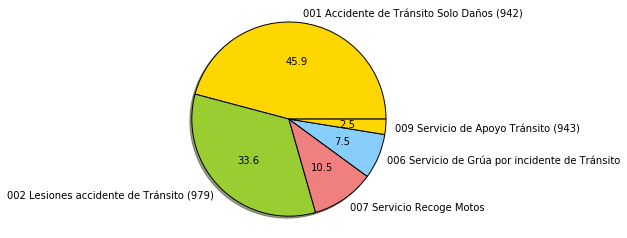

In [55]:
torta( cnts['tipo_incidente'].iloc[:5], etiquetas=cnts.index[:5] )

Para mejorar el aspecto la gráfica anterior podemos limitar la visualización a los 5 tipos de accidentes más comunes y ignorar el resto (para prpósitos de visualización).
Para esto modifique  el código de la llamada a torta esta manera:
`cnts['tipo_incidente']` -> `cnts['tipo_incidente'].iloc[:5]`, `cnts.index` -> `cnts.index[:5]` 

### Gráficos de barras verticales y horizontales

In [56]:
def barras_v( alturas, etiquetas, etiqueta_y, colores=COLORS, figsize=(10,8)) : 
    """Barras verticales"""    
    import numpy as np
    x_pos = np.arange(len(etiquetas))

    plt.figure( figsize=figsize )
    plt.bar(x_pos, alturas, color=colores, edgecolor='black')
    plt.xticks(x_pos + 0.5, etiquetas, rotation=-45 )
    plt.ylabel( etiqueta_y )
    

def barras_h( longitudes, etiquetas, etiqueta_x, colores=COLORS, figsize=(10,15)) : 
    """Barras horizontales"""    
    import numpy as np
    y_pos = np.arange(len(etiquetas))

    plt.figure( figsize=figsize )
    plt.barh( y_pos, longitudes, color=colores, edgecolor='black')
    plt.yticks( y_pos + 0.5, etiquetas )
    plt.xlabel( etiqueta_x )
    
    

In [57]:
cnts_barrio0 = pd.DataFrame( icd['barrio0'].value_counts() )
cnts_barrio0.head(10 )

,barrio0
La Candelaria,3365
Laureles-Estadio,1487
El Poblado,1310
Castilla,1253
Guayabal,1028
Belén,1026
Robledo,925
Aranjuez,822
La America,589
Buenos Aires,552


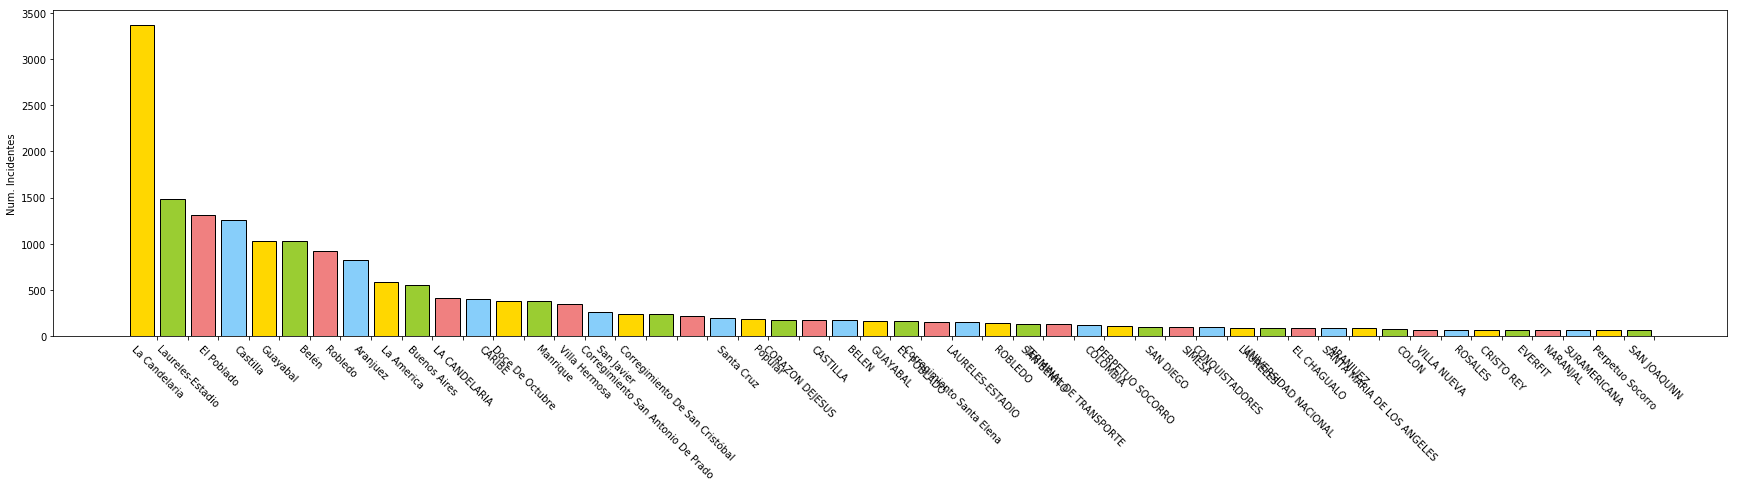

In [58]:
barras_v( cnts_barrio0['barrio0'].iloc[:50], cnts_barrio0.index[:50], 'Num. Incidentes' , figsize=(30,6))

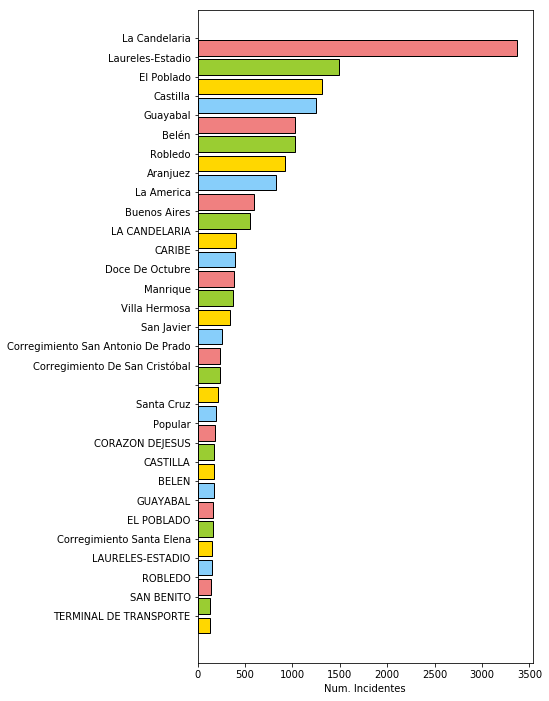

In [61]:
barras_h( cnts_barrio0['barrio0'].iloc[30::-1], 
          cnts_barrio0.index[30::-1],
          etiqueta_x='Num. Incidentes', figsize=(6,12) ) 

Para familiarizarse con los datos, escriba sentencias análogas (para generar conteos por valor) 
y visualice los resultados a través de una torta o un diagrama de barras para algunos de los siguientes: 
    `comuna`, `intervalo`, `tiene_ag`, `ag1`, `municipio`, `barrio0`, `sub_barrio0`, `vehi_invol1`, `vehi_invol2`, `intervalo`, `beta_1`
    

La siguiente tabla genera conteos para las distintas combinaciones de dos columnas. Aplicamos el conteo sobre la columna `cod` pero cualquier otra columna que no contenga nulos daría los mismos resultados...

In [ ]:
combi_vehi = ( icd.groupby(["vehi_invol1", "vehi_invol2"])
                  .agg( {"cod" : "count"} )
                  .reset_index()
                  .rename( columns= {"cod" : "conteo"} )
                  .sort_values( "conteo", ascending=False) )  

combi_vehi.head(20)

## Definición de tiempos de respuesta etc.

En esta sección comenzaremos a analizar que tan rápida es la respuesta a los incidentes de tránsito.

Para esto enriqueceremos el dataset con las siguientes columns: 
 
   *  **t_creacion:** Lapso de tiempo *en minutos* entre el   `f_alta` y `f_creacion`
   *  **t_respuesta:** Lapso de tiempo *en minutos* entre el  `f_creacion` y `f_en_lugar`
   *  **t_atencion:** Lapso de tiempo *en minutos* entre el   `f_en_lugar` y `f_creacion`
   *  **t_total:** Lapso de tiempo *en minutos* entre el      `f_creacion` y `f_fin`
   

In [67]:
icd['t_creacion']  = ( (icd['f_creacion'] - icd['f_alta']).dt.total_seconds() / 60.0)

icd['t_respuesta'] = ( ( icd['f_en_lugar']- icd['f_creacion'] ).dt.total_seconds() / 60.0)

#icd['t_atencion']  = ...
#icd['t_total']     = ... 

In [ ]:
icd['f_alta f_creacion f_en_lugar f_fin  t_creacion  t_respuesta  t_atencion  t_total'.split() ]

* Utilice `.describe()` para tener un resumen de las estadísticas (univariadas) más importantes de los tiempos definidos

In [63]:
import seaborn as sns  # este módulo facilita la elaboración de gráficos estádísticos 

# Referencias:
# https://seaborn.pydata.org/examples/index.html
# https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.htm

In [69]:
t_respuesta_trunc = icd.loc[(icd['t_respuesta'] < 200), 't_respuesta' ]
#t_atencion_trunc = icd.loc[(icd['t_atencion'] < 200), 't_atencion' ]

C:\Users\mrestrepo\AppData\Local\Continuum\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Fraccion de los incidentes')

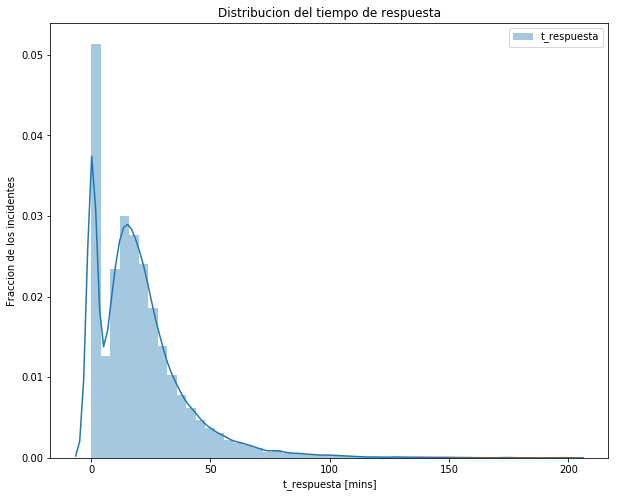

In [70]:
plt.figure( figsize=(10,8))
ax = sns.distplot( t_respuesta_trunc )
#sns.distplot( t_atencion_trunc )
ax.legend( ['t_respuesta', 't_atencion' ] )
ax.set_title ( 'Distribucion del tiempo de respuesta' )
ax.set_xlabel( 't_respuesta [mins]' )
ax.set_ylabel( 'Fraccion de los incidentes' )



### Gráficos de violín

Los gráficos de violín son gráficos de distribución de una variable continua para un conjunto de valores de una variable categórica.




In [ ]:
vehi_i1=icd['vehi_invol1'].value_counts()
vehi_i1.iloc[:5]

In [ ]:
plt.figure( figsize=(6,10) ) 
sns.violinplot(y = "vehi_invol1", 
               x = "t_atencion", 
               data=icd[ (icd['t_atencion'] < 200) & icd["vehi_invol1"].isin( vehi_i1.index.values[:10] )   ],
               orient= 'h',
               palette=["lightblue", "lightpink"]);

## Visualización geográfica

A continuación hacemos un análisis geográfico para visualizar las zonas 
    de la ciudad más problemáticas en términos de accidentalidad, así como aquellos barrios que presentan tiempos de atención muy altos.

In [74]:
import geopandas
# El siguiente archivo contiene los contornos (polígonos) que delimitan 
# geográficamente cada uno de los 332 barrios de Medellín.

# Fue descargado de: 
#   http://secondarycities.geonode.state.gov/layers/geonode:barriovereda/metadata_detail  (GeoJson)
#    http://secondarycities.geonode.state.gov/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3Abarriovereda&outputFormat=json&version=1.0.0&service=WFS&request=GetFeature
barrios_med = geopandas.read_file( 'C:/_DATA/DW3/barriovereda-Medellin.json', encoding="utf8")
print( "barrios_med.shape =", barrios_med.shape )
barrios_med.head() 


barrios_med.shape = (332, 7)


,id,Cod_Barrio,Barrio,Cod_Comuna,Shape_Leng,Shape_Area,geometry
0,barriovereda.1,Inst_15,U.P.B,11,1888.546049,220456.294001,"(POLYGON ((-75.58911446 6.24446531, -75.588999..."
1,barriovereda.2,Inst_18,Cerro Nutibara,16,2866.364599,406412.522763,"(POLYGON ((-75.5766947 6.23732606, -75.5762847..."
2,barriovereda.4,1620,El Nogal-Los Almendros,16,3096.624016,252879.374125,"(POLYGON ((-75.59551472 6.23661576, -75.595523..."
3,barriovereda.5,0612,El Triunfo,06,1746.563941,119228.403773,"(POLYGON ((-75.58618072 6.31006958, -75.586162..."
4,barriovereda.6,0808,Enciso,08,3383.139407,341364.263170,"(POLYGON ((-75.54604028999999 6.24683495, -75...."


Note que este archivo no contiene ninguna información relacionad con el tráfico!

Este es una gráfica de la información contenida aquí:

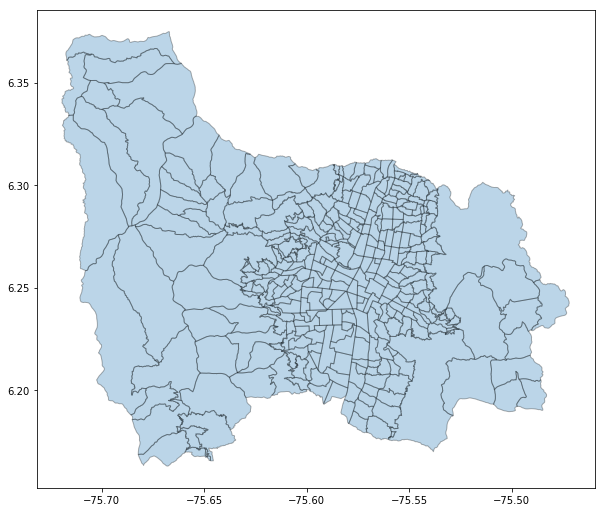

In [75]:
ax_med = barrios_med.plot(figsize=(10, 10), alpha=0.3, edgecolor='k')

De vuelta a nuestra tabla de incidentes...

Para darle color al mapa anterior, debemos cruzar la tabla de incidentes con 
la tabla de barrios, mediante las columnas de longitud y latitud que contiene 
la primera.  Para esto hay que convertir la tabla de incidentes en un `GeoDataFrame`

Esto se logra así:

In [78]:
def make_point( row ) :
    #print(type(row['lon']), row['lat'])
    return Point( (row['lon'], row['lat']) ) 

# Agregamos una columna coords de puntos geográficos (un punto es un par de coordenadas)
icd['coords'] = icd.apply( make_point, axis=1 )

gicd = geopandas.GeoDataFrame( icd, geometry='coords' ) 
# type( geo_incidentes ) = geopandas.geodataframe.GeoDataFrame
gicd.crs = {'init' :'epsg:4326'}

Ahora ponemos puntos sobre el mapa para los primeros 500incidentes.
No es recomendable hacer esto para mucho más de 1000 incidentes, porque el gráfico 
resultante pierde "veracidad" en razón de que es muy posible que 
muchos puntos queden montados unos encima de otros y no se representen adecuadamente zonas de muy alta densidad. 

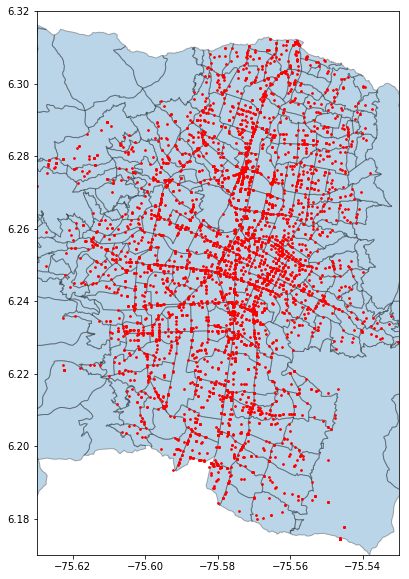

In [80]:
ax_med = barrios_med.plot(figsize=(10, 10), alpha=0.3, edgecolor='k')
gicd[0:5000].plot(ax=ax_med, markersize=3, color='red')

def set_lims_urbano( ax, long_lims= (-75.63, -75.53), lat_lims = (6.17, 6.32) ) :
    ax.set_xlim( long_lims )
    ax.set_ylim( lat_lims )
    
set_lims_urbano( ax_med ) 

Ahora sí hacemos el cruce. La siguiente operación cruza cada barrio con los accidentes contenidos en el mismo. 

In [81]:
gicd2 = geopandas.sjoin( barrios_med, gicd, op="contains" ) 

print( "tipo de gicd2 = ", type(gicd2) )
print( "Antes del cruce gicd.shape = ", gicd.shape ) 
print( "Después del cruce gicd2.shape = ", gicd2.shape ) 


tipo de gicd2 =  <class 'geopandas.geodataframe.GeoDataFrame'>
Antes del cruce gicd.shape =  (23285, 44)
Después del cruce gicd2.shape =  (23190, 51)


In [82]:
gicd2.head(5)  #gicd2 contiene información geográfica pegada a cada incidente!

,id,Cod_Barrio,Barrio,Cod_Comuna,Shape_Leng,Shape_Area,geometry,index_right,cod,tipo_incidente,tipo_fin,f_alta,f_creacion,f_en_lugar,f_fin,lat,lon,comuna,tiene_ag,ag1,ag2,ag3,intervalo,direccion,turno,vehi_invol1,vehi_invol2,vehi_invol3,vehi_invol4,vehi_smm,moto_smm,beta_1,beta_2,beta_3,moto,notas,dia_mes,dia_sem,mes_nomb,semana_anho,mes,hora,dir_partes,dir_n_partes,dir_0,interseccion,sub_barrio0,barrio0,municipio,t_creacion,t_respuesta
0,barriovereda.1,Inst_15,U.P.B,11,1888.546049,220456.294001,"(POLYGON ((-75.58911446 6.24446531, -75.588999...",17839,20180311115501000,001 Accidente de Tránsito Solo Daños (942),Conci. en el sitio,2018-03-11 11:54:35,2018-03-11 11:55:02,2018-03-11 12:07:07,2018-03-11 12:50:30,6.24239,-75.5868,Laureles-Estadio,Sí,Z6QYUu,NaN,NaN,10 a 20 minutos,0;C35_66B;Los Conquistadores;Laureles-Estadio;...,10:00-18:00,Automóvil (incluye camperos y camionetas),Bus (incluye busetas y colectivos),NaN,NaN,NaN,Moto,NaN,NaN,NaN,TT-841,+ 11/03/2018 11:55:01-bzapata: COLISION DE BUS...,11,Domingo,Marzo,10,3,11,"[0, C35_66B, Los Conquistadores, Laureles-Esta...",5,0,C35_66B,Los Conquistadores,Laureles-Estadio,Medellín,0.450000,12.083333
0,barriovereda.1,Inst_15,U.P.B,11,1888.546049,220456.294001,"(POLYGON ((-75.58911446 6.24446531, -75.588999...",13874,20180224155407000,001 Accidente de Tránsito Solo Daños (942),Conci. en el sitio,2018-02-24 15:53:34,2018-02-24 15:54:07,2018-02-24 16:28:55,2018-02-24 16:40:27,6.24239,-75.5868,Laureles-Estadio,Sí,epZho+,NaN,NaN,30 a 60 minutos,0;K66B_35;Los Conquistadores;Laureles-Estadio;...,13:00-21:00,Automóvil (incluye camperos y camionetas),NaN,NaN,NaN,Vehículo,NaN,REGULACION,NaN,NaN,NaN,+ 24/02/2018 15:54:07-jcanola: OPTRA Y KIA PIC...,24,Sábado,Febrero,8,2,15,"[0, K66B_35, Los Conquistadores, Laureles-Esta...",5,0,K66B_35,Los Conquistadores,Laureles-Estadio,Medellín,0.550000,34.800000
0,barriovereda.1,Inst_15,U.P.B,11,1888.546049,220456.294001,"(POLYGON ((-75.58911446 6.24446531, -75.588999...",7393,20180201140831000,009 Servicio de Apoyo Tránsito (943),Positivo,2018-02-01 14:07:46,2018-02-01 14:08:31,2018-02-01 14:24:53,2018-02-01 15:45:02,6.24239,-75.5868,Laureles-Estadio,Sí,qKgjMx,NaN,NaN,10 a 20 minutos,0;K66B_35;Los Conquistadores;Laureles-Estadio;...,NaN,Automóvil (incluye camperos y camionetas),NaN,NaN,NaN,Vehículo,Moto,TT-060,REGULACION,NaN,MO-298,+ 01/02/2018 14:08:31-jramirez: ORIENTE OCCI\n...,1,Jueves,Febrero,5,2,14,"[0, K66B_35, Los Conquistadores, Laureles-Esta...",5,0,K66B_35,Los Conquistadores,Laureles-Estadio,Medellín,0.750000,16.366667
0,barriovereda.1,Inst_15,U.P.B,11,1888.546049,220456.294001,"(POLYGON ((-75.58911446 6.24446531, -75.588999...",22545,20180328091209000,002 Lesiones accidente de Tránsito (979),Positivo,2018-03-28 09:11:21,2018-03-28 09:12:10,2018-03-28 09:23:13,2018-03-28 11:44:24,6.24279,-75.5864,Laureles-Estadio,Sí,8HZyj8,NaN,NaN,10 a 20 minutos,0;K66B_35A;Los Conquistadores;Laureles-Estadio...,05:30-13:30,Moto,Peatón,NaN,NaN,NaN,Moto,NaN,NaN,NaN,MO-736,\n+ 28/03/2018 09:12:36-mmetaute: HACIA EL PAR...,28,Miércoles,Marzo,13,3,9,"[0, K66B_35A, Los Conquistadores, Laureles-Est...",5,0,K66B_35A,Los Conquistadores,Laureles-Estadio,Medellín,0.816667,11.050000
0,barriovereda.1,Inst_15,U.P.B,11,1888.546049,220456.294001,"(POLYGON ((-75.58911446 6.24446531, -75.588999...",7194,20180131185102000,001 Accidente de Tránsito Solo Daños (942),Conci. en el sitio,2018-01-31 18:50:48,2018-01-31 18:51:03,2018-01-31 18:51:17,2018-01-31 18:55:07,6.24279,-75.5864,Laureles-Estadio,Sí,+Y5iAZ,NaN,NaN,0 a 10 minutos,0;C35A_66B;Los Conquistadores;Laureles-Estadio...,14:00-22:00,Automóvil (incluye camperos y camionetas),Taxi,NaN,NaN,Vehículo,NaN,REGULACION,NaN,NaN,NaN,+ 31/01/2018 18:51:02-mrios: AG-207\n\n+ 31/01...,31,Miércoles,Enero,5,1,18,"[0, C35A_66B, Los Conquistadores, Laureles-Est...",5,0,C35A_66B,Los Conquistadores,Laureles-Estadio,Medellín,0.250000,0.233333


Ahora agregamos por barrio y calculamos la media del tiempo de respuesta 

In [83]:
t_resp_geo = ( gicd2.groupby('Cod_Barrio')
                    .agg({'cod' : 'count', 
                          't_respuesta' : 'mean', # Esta es la variable que nos interesa visualizar!
                          'Barrio' : 'first',
                          #'barrio0' : 'first',
                          'sub_barrio0' : 'first',
                          'geometry' : 'first'})
                    .rename( columns = {"cod" : "conteo",
                                        "t_respuesta" : "media_t_resp"} )
             ) 

t_resp_geo  = geopandas.GeoDataFrame( t_resp_geo, geometry='geometry',
                                      crs={'init' :'epsg:4326'} )  

print("t_resp_geo.shape =", t_resp_geo.shape )
t_resp_geo.head()

t_resp_geo.shape = (310, 5)


,conteo,media_t_resp,Barrio,sub_barrio0,geometry
Cod_Barrio,,,,,
0101,43,37.818254,Santo Domingo Savio No.1,Santo Domingo Savio No. 1,"(POLYGON ((-75.54302104 6.30171706, -75.542980..."
0102,9,58.566667,Santo Domingo Savio No.2,POPULAR,"(POLYGON ((-75.54062098 6.30237467, -75.540560..."
0103,32,43.420000,Popular,Popular,"(POLYGON ((-75.54756272 6.30375937, -75.547385..."
0104,25,37.715278,Granizal,Popular,"(POLYGON ((-75.54883191 6.29488604, -75.548819..."
0105,10,31.181667,Mosc� No.2,San Pablo,"(POLYGON ((-75.54879548 6.29203485, -75.548788..."


Si intentamos hacer una mapa a partir de geodataframe, el gráfico resultante no es  muy informativo...

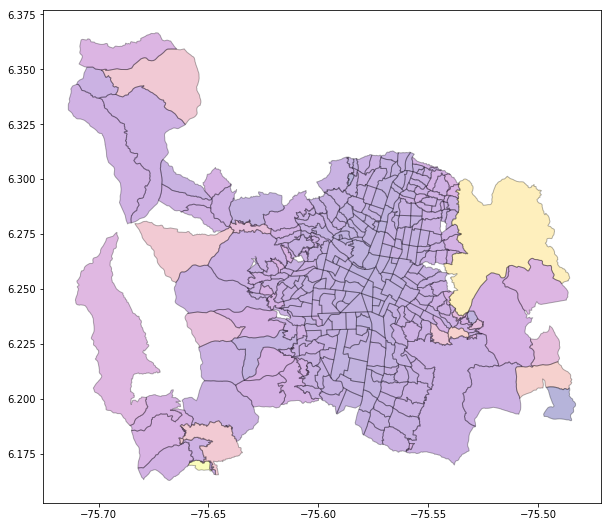

In [85]:
ax_med = t_resp_geo.plot(column = 'media_t_resp' ,
                         figsize=(10, 10), alpha=0.3, edgecolor='k',
                         cmap= plt.get_cmap('plasma')  )

La razón es que hay unos pocos barrios valores anómalo (outlier) del medio de tiempo de respuesta...

In [86]:
t_resp_geo.sort_values( 'media_t_resp', ascending=False)

,conteo,media_t_resp,Barrio,sub_barrio0,geometry
Cod_Barrio,,,,,
8008,3,201.150000,San Jos�,El Vergel,"(POLYGON ((-75.65546677 6.17206897, -75.655448..."
9003,12,180.693056,Piedras Blancas - Matasano,Piedras Blancas,"(POLYGON ((-75.50973495 6.29901785, -75.509703..."
0902,40,124.522650,Barrios de Jes�s,Las Estancias,"(POLYGON ((-75.53886008000001 6.23231923, -75...."
9006,26,123.073913,Santa Elena Sector Central,El Cerro,"(POLYGON ((-75.48574707 6.20505259, -75.486032..."
AUC2,210,108.222439,San Antonio de Prado,Cabecera San Antonio de Prado,"(POLYGON ((-75.64451696 6.18918882, -75.644383..."
6001,8,107.835417,La Palma,SAN CRISTOBAL,"(POLYGON ((-75.64413865 6.27618569, -75.643875..."
5004,5,105.836667,Palmitas Sector Central,Suburbano Palmitas,"(POLYGON ((-75.6608198 6.35901038, -75.6605157..."
0903,30,94.004167,Bombon� No.2,Bombona No. 2,"(POLYGON ((-75.54060615 6.22717087, -75.540593..."
AUC1,128,84.523967,Cabecera Urbana Corregimiento San Crist�bal,Corregimiento de San Crist¥bal,"(POLYGON ((-75.63648101 6.28069802, -75.636480..."


Una idea para obtener un gráfico con más variación de colores aplicarle una función monótona (como sqrt = "square root" = raíz cuadrada)

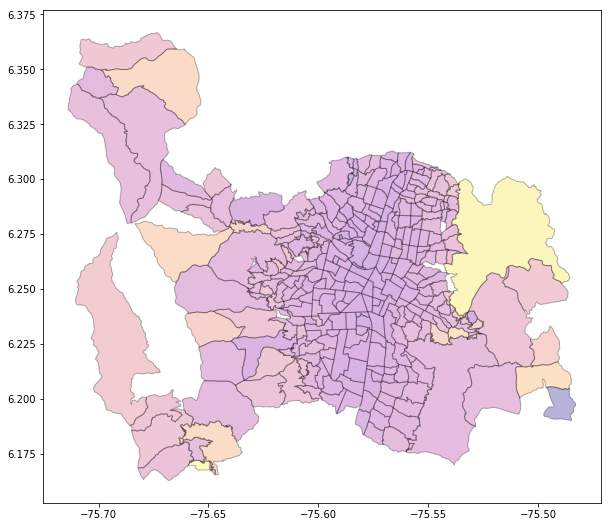

In [87]:
t_resp_geo[ "sqrt_media_t_resp" ] = np.sqrt( t_resp_geo[ "media_t_resp" ] )  

ax_med = t_resp_geo.plot(column = 'sqrt_media_t_resp' ,
                         figsize=(10, 10), alpha=0.3, edgecolor='k',
                         cmap= plt.get_cmap('plasma')  )

In [ ]:
Otra idea es no pintar los n barrios con valores más extremos

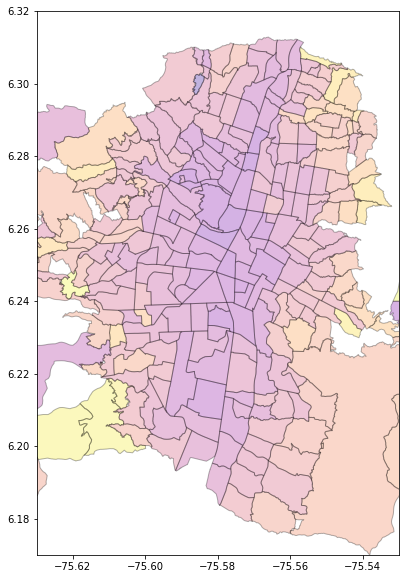

In [88]:
#t_resp_geo[ "sqrt_media_t_resp" ] = np.sqrt( t_resp_geo[ "media_t_resp" ] )  
n = 30

subgeo_df = ( t_resp_geo.sort_values( 'media_t_resp', ascending=False)
                        .iloc[ n: ] ) # esto ignora los primeros n registros del dataframe ordenado por media de tiempo de respuesta
            
ax_med = ( subgeo_df.plot(column  = 'media_t_resp' ,
                          figsize = (10, 10), alpha=0.3, edgecolor='k',
                          cmap = plt.get_cmap('plasma') ) ) 

set_lims_urbano( ax_med ) 

 *  Intente cambiar el mapa de colores del mapa anterior. En `plt.get_cmap( 'bwr' )` reemplace `'bwr'` por otro nombre de un mapa de colores como los que se encuentran aquí: https://matplotlib.org/examples/color/colormaps_reference.html  . El nombre de mapa de colores es la cadena que aparece a la izquierda. Tenga cuidado con mayúsculas y minúsculas... 

### Añadiendo un mapa de fondo

In [89]:
subgeo_df1 = subgeo_df.to_crs( epsg=3857 )
subgeo_df1

,conteo,media_t_resp,Barrio,sub_barrio0,geometry,sqrt_media_t_resp
Cod_Barrio,,,,,,
9002,4,49.100000,Media Luna,Corregimiento Santa Elena,(POLYGON ((-8406173.947492674 697739.019004049...,7.007139
1312,12,48.706944,Betania,Betania,(POLYGON ((-8417855.140260406 696854.279395566...,6.979036
7007,6,47.400000,San Jos� del Manzanillo,Corregimiento de Altavista,(POLYGON ((-8416929.265999215 693606.633226667...,6.884766
7008,1,47.266667,El Jard�n,Altavista,(POLYGON ((-8417643.65660499 691243.0612648325...,6.875076
AE6,6,46.322222,�rea de Expansi�n Bel�n Rinc�n,Zona de Expansion Belen Rincon,(POLYGON ((-8416823.631594818 693624.885704340...,6.806043
0202,19,45.618519,Play�n de Los Comuneros,La Isla,(POLYGON ((-8410970.627540506 703858.530845872...,6.754148
0904,44,45.485985,Los Cerros El Vergel,Alejandro Echavarria,(POLYGON ((-8409114.631066358 695099.036084286...,6.744330
0311,8,43.477778,La Cruz,La Cruz,"(POLYGON ((-8408527.4040545 699936.3000513548,...",6.593768
0103,32,43.420000,Popular,Popular,(POLYGON ((-8409916.212663297 703151.290092572...,6.589385


In [ ]:
geopandas.tools.

In [90]:
lon_lims=(-75.63, -75.53)
lat_lims= (6.17, 6.32) 

lims_gs = geopandas.GeoSeries( pd.DataFrame( list(zip( lon_lims, lat_lims )), 
                                             columns=["lon", "lat"] )
                                 .apply( make_point, axis=1), 
                              crs= { 'init' : 'epsg:4326' } )
#lims_gs.crs = {'init' :'epsg:4326'}
lims_gs = lims_gs.to_crs( epsg=3857 )
lims_gs[0].x

-8419093.08869528

In [91]:
def mapa( geo_df, column ,
          cmap_name='bwr',
          lon_lims= (-75.63, -75.53),
          lat_lims= (6.17, 6.32),
          figsize=(10,10), alpha=0.3, edgecolor='k',
          con_fondo=False,
          tile_url="https://a.tile.openstreetmap.org/tileZ/tileX/tileY.png", 
          tile_zoom=12) : 
    
    import contextily as ctx
    geo_df2 = geo_df.to_crs( epsg=3857 )

    ax = geo_df2.plot(column = column, cmap = plt.get_cmap(cmap_name), 
                      figsize=figsize, alpha=alpha, edgecolor=edgecolor)
        
    # Setting lims
    lims_gs = geopandas.GeoSeries( pd.DataFrame( list(zip( lon_lims, lat_lims )), 
                                                 columns=["lon", "lat"] )
                                 .apply( make_point, axis=1), 
                              crs= { 'init' : 'epsg:4326' } )
    #lims_gs.crs = {'init' :'epsg:4326'}
    lims_gs = lims_gs.to_crs( epsg=3857 )
    
    ax.set_xlim((lims_gs[0].x, lims_gs[1].x))
    ax.set_ylim((lims_gs[0].y, lims_gs[1].y))
    ax.set_xticklabels( [] ) 
    ax.set_yticklabels( [] ) 
    
    if con_fondo : 
        ctx.add_basemap( ax, zoom=tile_zoom, url=tile_url )
    
    return ax

Lo siguiente toma unos cuantos segundos:

ChunkedEncodingError: ('Connection broken: OSError("(10053, \'WSAECONNABORTED\')",)', OSError("(10053, 'WSAECONNABORTED')",))

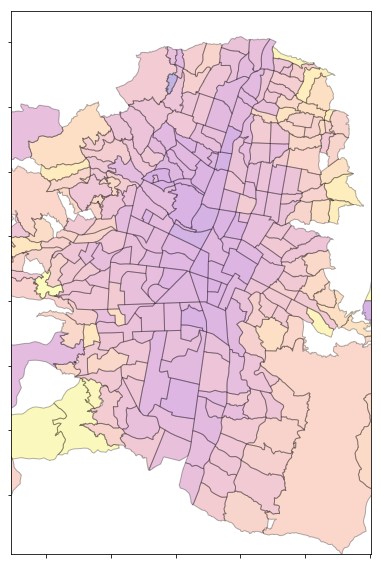

In [93]:
mapa( subgeo_df, 'media_t_resp', cmap_name='plasma', 
     con_fondo=True )
plt.show() 

La razon de la demora es que la función se conecta con un servicio de internet gratuito (pero bastante lento) para bajar imágenes que sirven como fondo del mapa. Para agilizar el su desarrollo, puede llamar la funcion con `con_fondo=False` para no repetir este proceso cada vez. 

## Otras Preguntas para explorar...

 * Cómo están distribuidos los incidentes a lo largo del día? 
   
   **Sugerencia:** Intente hacer un histograma o un gráfico de densidad a partir de la hora del dia. 
   
   
 * Hay agentes más eficientes que otros? (La columna `ag1` contiene un identificador anonimizado del agente de tránsito que inicialmente se encargó del incidente)
   **Idea**:  Puede explorar los tiempos de respuesta y de atención promedio y sus desviaciones estándar luego de agrupar por agente. 
   
   
 * Son diferentes los mapas mostrados arriba para semana vs. fin de semana. 
     **Sugerencia** : Para responder a esta pregunta puede generar dos versiones de alguno de los mapas, para dos subconjuntos del dataframe inicial filtrado así : `gicd_sem = gicd[ gicd['dia_sem'].isin('Lunes','Martes', etc...) ]` 
     
 * Cualquier otra pregunta que le interese